In [1]:
import sys
sys.path.append('../utils')
from nd_tools import scale_img

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm

The goal of this notebook is how to visualize backscatter images as RGB.

# Inspecting the data

In [2]:
data_dir = Path('../data')
backscatter_tifs = sorted(list(data_dir.glob('./*backscatter*.tif')))
backscatter_tifs

[PosixPath('../data/alos_backscatter_hh.tif'),
 PosixPath('../data/alos_backscatter_hv.tif')]

In [3]:
data_dir = Path('../data')
tv_tifs = sorted(list(data_dir.glob('./*tv.tif')))
tv_tifs

[PosixPath('../data/alos_hh_tv.tif'), PosixPath('../data/alos_hv_tv.tif')]

# RGB Composites

We are going to create an RGB composite following this [guide](http://ceos.org/document_management/SEO/DataCube/Laymans_SAR_Interpretation_Guide_2.0.pdf). Specifically,

+ Red = HH
+ Green = HV
+ blue = (HH / HV)

We scale each channel so that it lies between 0 and 1 so it can be read by python.

In [4]:
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)
    return band

bands = list(map(open_one, backscatter_tifs))
eps = .00001
bands += [bands[0] / (bands[1] + eps)]

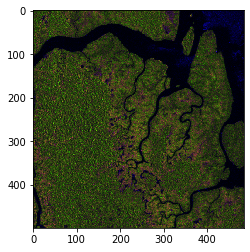

In [5]:
bands = list(map(scale_img, bands))
rgb = np.stack(bands, axis=2)
plt.imshow(rgb)

## Excercise 1 - Make a TV Denoised RGB

Use the TV Denoised Images to create an RGB image as before.

In [6]:
## Answer

In [7]:
## Answer

In [8]:
## Answer

# Exercise 2 - Make an RGB from dB images 

How does k-means run on this?

In [9]:
## Answer

In [10]:
## Answer

# Exercise 3

Use the RGB from the previous exercise to perform k-means with three classes. What do you notice?

In [11]:
## Answer

In [12]:
## Answer

# Acknowledgements

A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.